# Implementing Vanilla Perceptron algorithm. 

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Vanilla Perceptron model

In [164]:
def Vanilla(X, Y, Xt, Yt, epochs = 4):
    # no: of data set
    n = X.shape[0]
    nt = Xt.shape[0]
    # no: 0f fetures
    f = X.shape[1]
    ft = Xt.shape[1]
    # weights and bias
    w = np.ones(f)
    b = 0
    
    eff = []
    for e in range(epochs):
        # training
        for i in range(n):
            # action
            a = np.dot(w, X[i]) + b
            
            # update weigts and bias
            if (Y[i]*a <= 0):
                w += np.multiply(X[i], Y[i])
                b += Y[i] 
        
        # testing
        s = 0
        for i in range(nt):
            # action
            a = np.dot(w, Xt[i]) + b
            if np.sign(a) == Yt[i]:
                s += 1
        print('no: of false prediction in epoch '+str(e)+':', nt-s)
        # efficiancy
        ef = s/nt*100
        eff.append(ef)
        
    return eff, w, b
                
        

### Voted Perceptron model

In [165]:
def Voted(X, Y, Xt, Yt, epochs = 10):
    # no: of data set
    n = X.shape[0]
    nt = Xt.shape[0]
    # no: 0f fetures
    f = X.shape[1]
    ft = Xt.shape[1]
    # weights and bias
    w = np.ones(f)
    b = 0
    v = 1
    
    
    eff = []
    for e in range(epochs):
        
        # vote
        wv = 0
        bv = 0
        
        # training
        for i in range(n):
            # action
            a = np.dot(w, X[i]) + b
            v += 1
            # update weigts and bias
            if (Y[i]*a <= 0):
                wv += np.multiply(w, v)
                bv += np.multiply(b, v)
                v = 1
                w += np.multiply(X[i], Y[i])
                b += Y[i] 
        
        # vote udate
        w = wv/n
        b = bv/n
        
        # testing
        s = 0
        for i in range(nt):
            # action
            a = np.dot(w, Xt[i]) + b
            if np.sign(a) == Yt[i]:
                s += 1
        
        print('no: of false prediction in epoch '+str(e)+':', nt-s)    
        # efficiancy
        ef = s/nt*100
        eff.append(ef)
        
    return eff, w, b
                
        

## Data set

In [166]:
Data = pd.read_csv('./abalone/abalone.data')
df = pd.DataFrame(Data)
df

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


#### Training data

In [167]:
# feature vcetors
X_tr = np.array(df.iloc[:-500,1:])
# labels
Y_tr = np.array(df.iloc[:-500,0])

# swapping the labels to 1 or -1
Y_tr[Y_tr == 'M'] = 1
Y_tr[Y_tr == 'F'] = 1
Y_tr[Y_tr == 'I'] = -1

#### Testing data

In [168]:
# feature vcetors
X_ts = np.array(df.iloc[-500:,1:])
# labels
Y_ts = np.array(df.iloc[-500:,0])

# swapping the labels to 1 or -1
Y_ts[Y_ts == 'M'] = 1
Y_ts[Y_ts == 'F'] = 1
Y_ts[Y_ts == 'I'] = -1

In [169]:
X_tr.shape[0]

3676

## Trying out the models

In [170]:
epochs = 20

### vanilla

In [171]:
eff_van, w1, b1 = Vanilla(X_tr, Y_tr, X_ts, Y_ts, epochs = epochs)

no: of false prediction in epoch 0: 93
no: of false prediction in epoch 1: 114
no: of false prediction in epoch 2: 115
no: of false prediction in epoch 3: 114
no: of false prediction in epoch 4: 115
no: of false prediction in epoch 5: 111
no: of false prediction in epoch 6: 97
no: of false prediction in epoch 7: 113
no: of false prediction in epoch 8: 97
no: of false prediction in epoch 9: 96
no: of false prediction in epoch 10: 98
no: of false prediction in epoch 11: 97
no: of false prediction in epoch 12: 112
no: of false prediction in epoch 13: 112
no: of false prediction in epoch 14: 112
no: of false prediction in epoch 15: 99
no: of false prediction in epoch 16: 102
no: of false prediction in epoch 17: 102
no: of false prediction in epoch 18: 113
no: of false prediction in epoch 19: 111


### voted

In [172]:
eff_vot, w1, b1 = Voted(X_tr, Y_tr, X_ts, Y_ts, epochs = epochs)

no: of false prediction in epoch 0: 133
no: of false prediction in epoch 1: 109
no: of false prediction in epoch 2: 106
no: of false prediction in epoch 3: 100
no: of false prediction in epoch 4: 100
no: of false prediction in epoch 5: 99
no: of false prediction in epoch 6: 100
no: of false prediction in epoch 7: 100
no: of false prediction in epoch 8: 100
no: of false prediction in epoch 9: 97
no: of false prediction in epoch 10: 100
no: of false prediction in epoch 11: 101
no: of false prediction in epoch 12: 101
no: of false prediction in epoch 13: 101
no: of false prediction in epoch 14: 100
no: of false prediction in epoch 15: 102
no: of false prediction in epoch 16: 100
no: of false prediction in epoch 17: 100
no: of false prediction in epoch 18: 102
no: of false prediction in epoch 19: 103


## Comparison

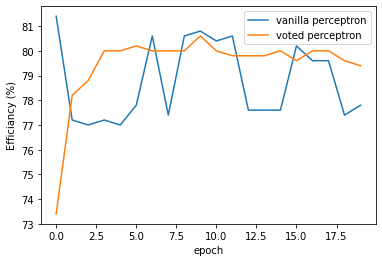

In [173]:
ep = range(epochs)
plt.plot(ep, eff_van, label = 'vanilla perceptron')
plt.plot(ep, eff_vot, label = 'voted perceptron')
plt.ylabel('Efficiancy (%)')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [174]:
# data = []
# for i in range(len(dat)):
#     a = np.insert(dat[i], 1, 1 if dat[i][0] == 'M' else np.insert(dat[i], -1, 1) )
#     data.append(list(a))

In [175]:
np.multiply([9,8,4],[2])

array([18, 16,  8])

In [176]:
a = np.arange(1, 9, 1)
a = np.insert(data, (0,1), 0)
a

/usr/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


array([0,
       list(['M', 1, 0.35, 0.265, 0.09, 0.2255, 0.0995, 0.0485, 0.07, 7]),
       0, ...,
       list(['M', 1, 0.6, 0.475, 0.205, 1.176, 0.5255, 0.2875, 0.308, 9]),
       list(['F', 'F', 0.625, 0.485, 0.15, 1.0945, 0.531, 0.261, 0.296, 1, 10, 0.625, 0.485, 0.15, 1.0945, 0.531, 0.261, 0.296, 10]),
       list(['M', 1, 0.71, 0.555, 0.195, 1.9485, 0.9455, 0.3765, 0.495, 12])],
      dtype=object)

In [177]:
np.sign(-9)

-1